#Campus Recruitment Prediction With Machine Learning for MBA Students


 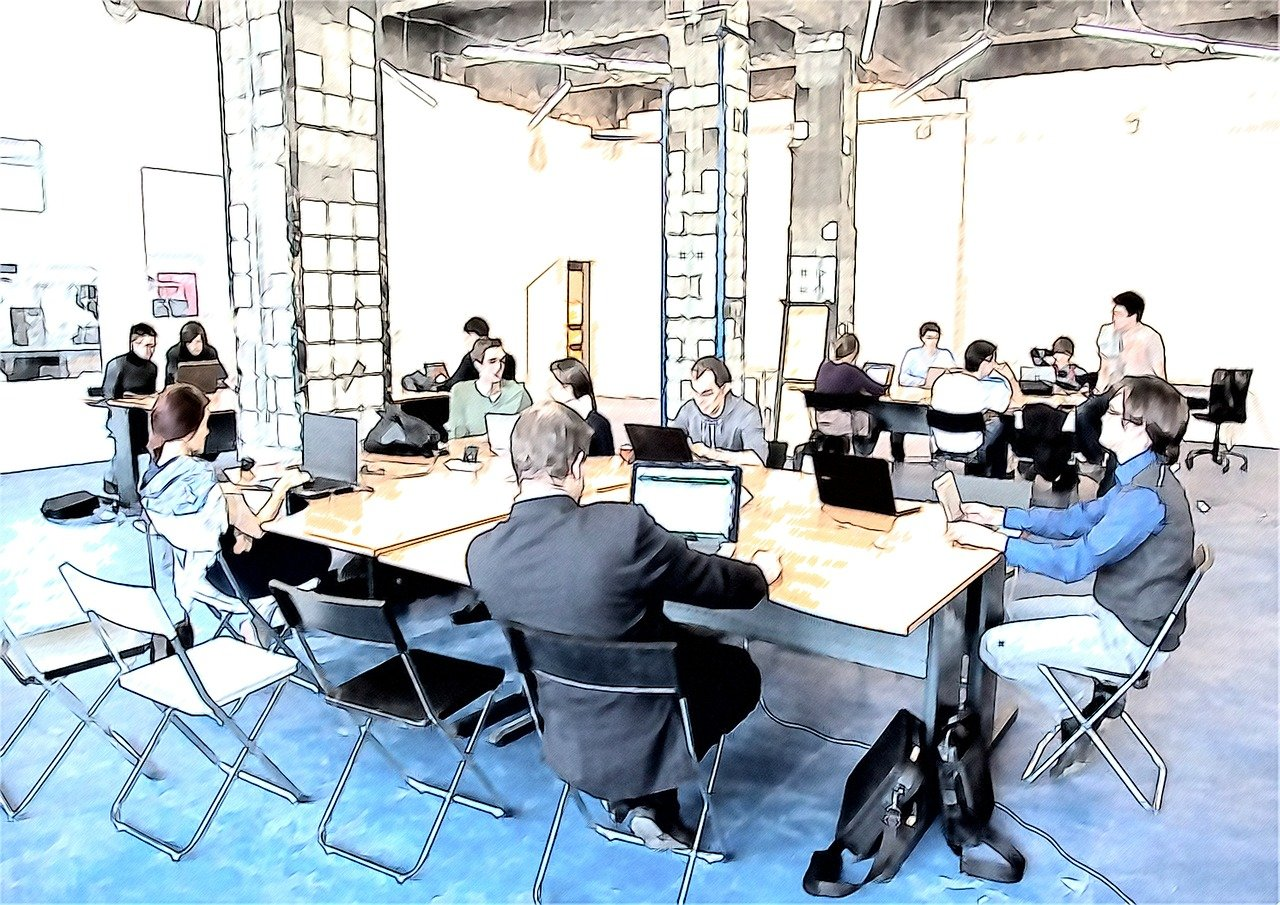

**Student Name:** WEERASINGHA W.M.N.S.

**Registration Number:** EG/2020/4268

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [7]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix

## Data Loading

In [8]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.
file_path = 'Placement_Data_Full_Class.csv'

# Your code goes here
df = pd.read_csv(file_path)

# Print the first five rows of the loaded dataframe

# Your code goes here
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [9]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop(columns=['sl_no'], inplace=True)
print(df.head())

  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


## Exploratory Data Analysis (EDA)

In [10]:
# Identify the shape of the loaded dataframe

# Your code goes here
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (215, 14)


In [11]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:** gender ssc_b (Secondary Education Board)

hsc_b (Higher Secondary Education Board)
hsc_s (Higher Secondary Education Specialization ) degree_t (Type of Undergraduate Degre e) workex (Work Experien ce) specialisation (MBA Specializat ion) status (Placement S

Numerical features: sl_no (Serial Number)

ssc_p (Secondary Education Percentage)
hsc_p (Higher Secondary Education Percentage ) degree_p (Undergraduate Degree Percentag e) etest_p (E-test Percenta ge) mba_p (MBA Percent age) salary (Salary offered after placement)tatus)

In [12]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
numerical_descriptive = df.describe()
print(numerical_descriptive)

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**  The reason for splitting the dataset into train and test sets and utilizing only the train set for visualizations is to prevent data leakage. Visualizations are often used for exploratory purposes and feature engineering, which should ideally be done on the training set only to ensure that the model is not influenced by information from the test set. 

In [13]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
from sklearn.model_selection import train_test_split

# Separate independent variables (features) and dependent variable (target)
X = df.drop(columns=['status', 'salary'])  # Independent variables (excluding 'status' and 'salary')
y = df['status']  # Dependent variable (target)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (172, 12)
Shape of X_test: (43, 12)
Shape of y_train: (172,)
Shape of y_test: (43,)


In [14]:
# Print number of training data points

# Your code goes here
print("Number of training data points:", len(X_train))

Number of training data points: 172


In [15]:
# Print number of testing data points

# Your code goes here
print("Number of testing data points:", len(X_test))

Number of testing data points: 43


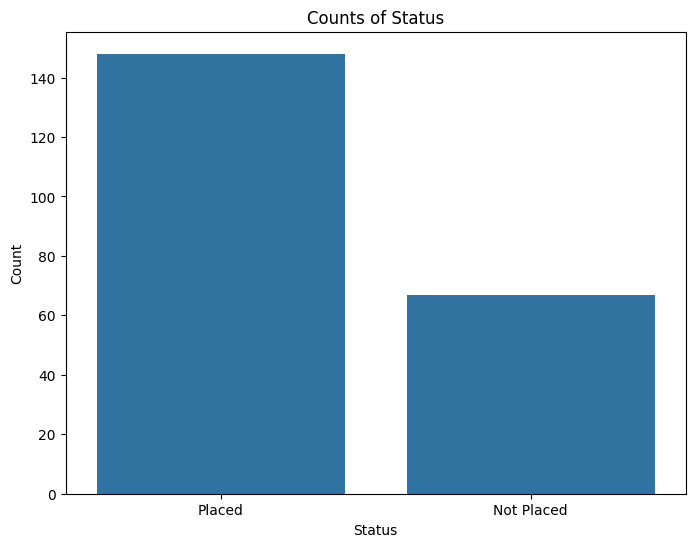

In [16]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

# Plot counts of status using seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Counts of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. Biased Model - model tends to predict the majority class more accurately while neglecting the minority class.
2. Poor Generalization - Imbalanced datasets may result in poor generalization of the model to new data, particularly for the minority class.
3. Misinterpretation of Model Performance - accuracy alone may not be a reliable metric to evaluate model performance.



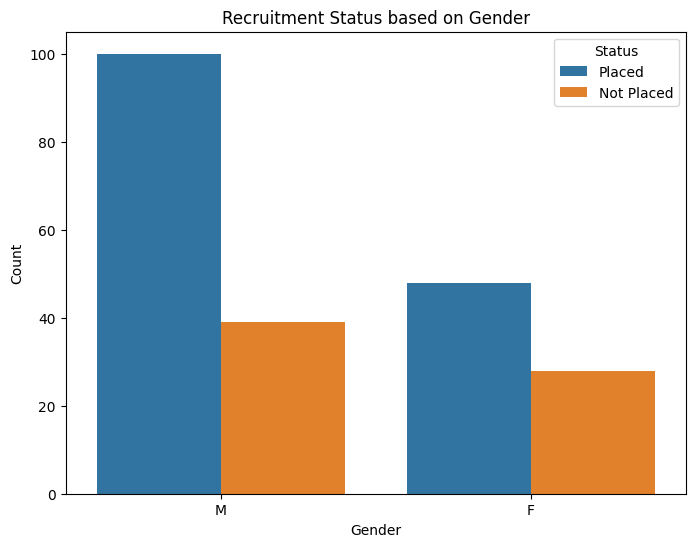

In [17]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='status', data=df)
plt.title('Recruitment Status based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.show()

**Q:** Explain the observation from the above table.
> **A:**Placement Status: It appears that there are more male students who have been placed compared to female students. This is indicated by the taller bars in the "Placed" category for males compared to females.
Not Placed Status: There are fewer male students who have not been placed compared to female students. This is shown by the shorter bars in the "Not Placed" category for males compared to females.s.

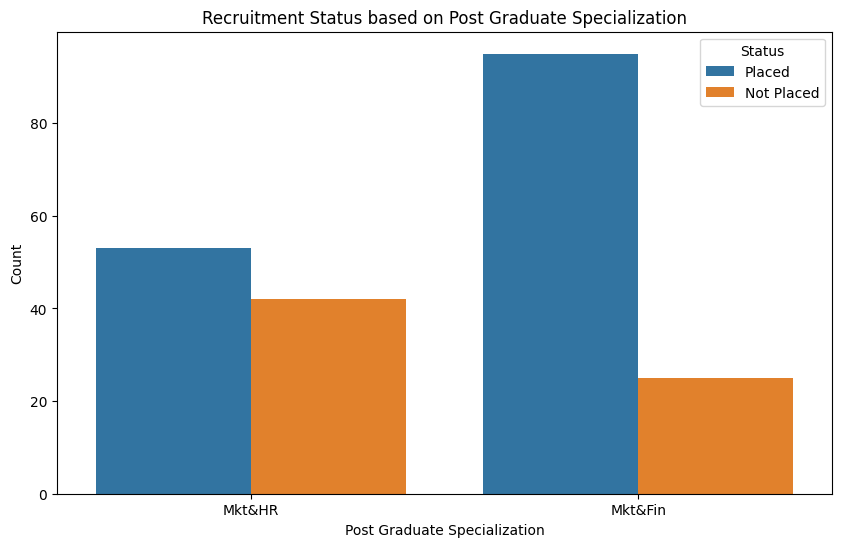

In [18]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
plt.figure(figsize=(10, 6))
sns.countplot(x='specialisation', hue='status', data=df)
plt.title('Recruitment Status based on Post Graduate Specialization')
plt.xlabel('Post Graduate Specialization')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.show()

**Q:** Inteprete the above results.
> **A:**the number of placed students seems to be higher for the Mkt&Fin specialization compared to the Mkt&HR specialization.

there are fewer students who have not been placed for both specializations. the number of students not placed seems to be slightly higher for the Mkt&HR specialization compared to the Mkt&Fin specialization.

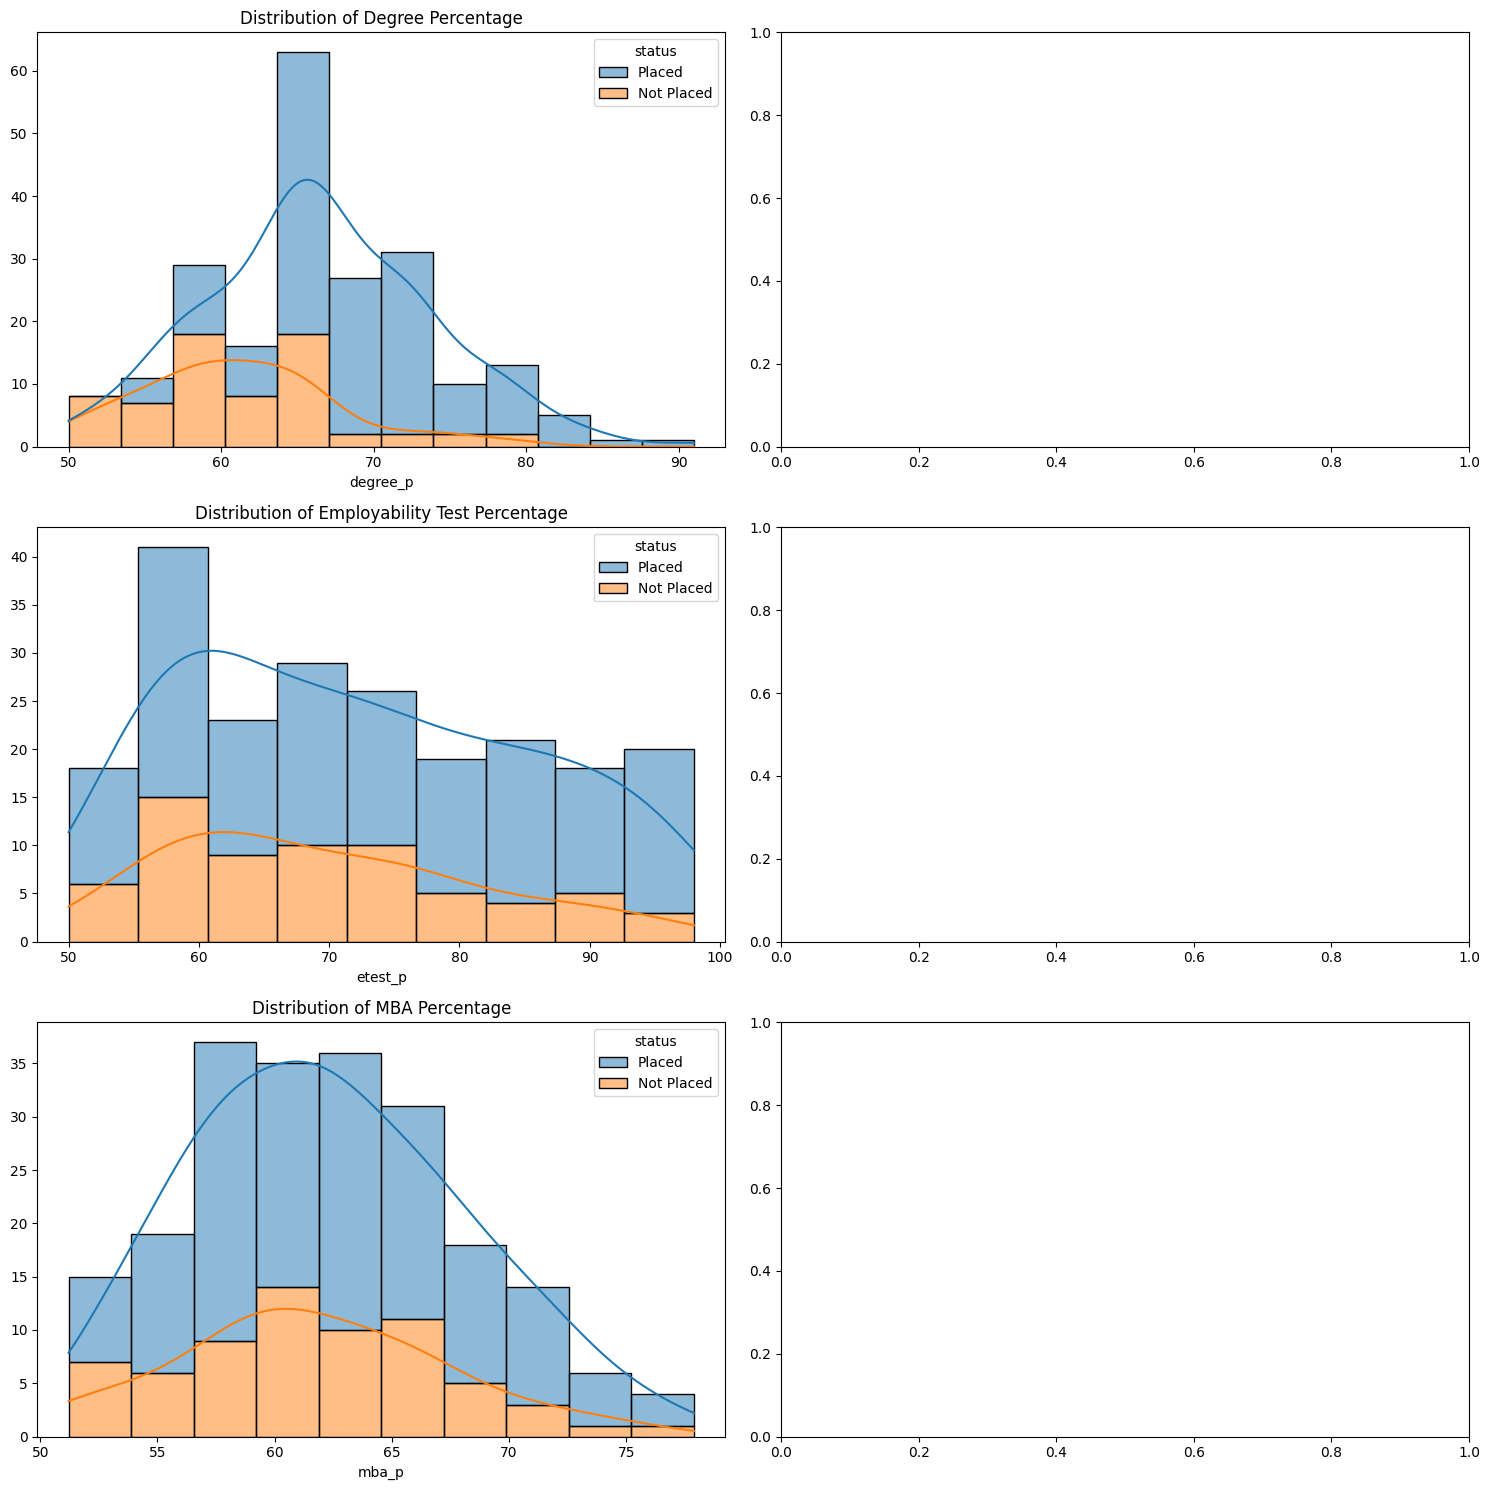

In [19]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot histogram for Degree Percentage
sns.histplot(df, x='degree_p', hue='status', multiple='stack', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Degree Percentage')

# Plot histogram for Employability Test Percentage
sns.histplot(df, x='etest_p', hue='status', multiple='stack', ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Employability Test Percentage')

# Plot histogram for MBA Percentage
sns.histplot(df, x='mba_p', hue='status', multiple='stack', ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribution of MBA Percentage')

# Remove y-axis labels for better visibility
axes[0, 0].set_ylabel('')
axes[1, 0].set_ylabel('')
axes[2, 0].set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**
>
> 
> Distribution of Degree Percentage: It gives an understanding of the spread of undergraduate performance among the students in the dataset.
>
> 
Distribution of Employability Test Percentage: It provides insights into the performance of students in this test, which could be a factor influencing their placemen
>
> 

Distribution of MBA Percentage: It offers insights into the spread of performance among students in their postgraduate studies, which could also influence their placement.

In [20]:
# Check for the null values in train set

# Your code goes here
null_values_train = X_train.isnull().sum()
print("Null values in train set:\n", null_values_train)

Null values in train set:
 gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64


In [21]:
# Check for the null values in test set

# Your code goes here
null_values_test = X_test.isnull().sum()
print("Null values in test set:\n", null_values_test)

Null values in test set:
 gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64


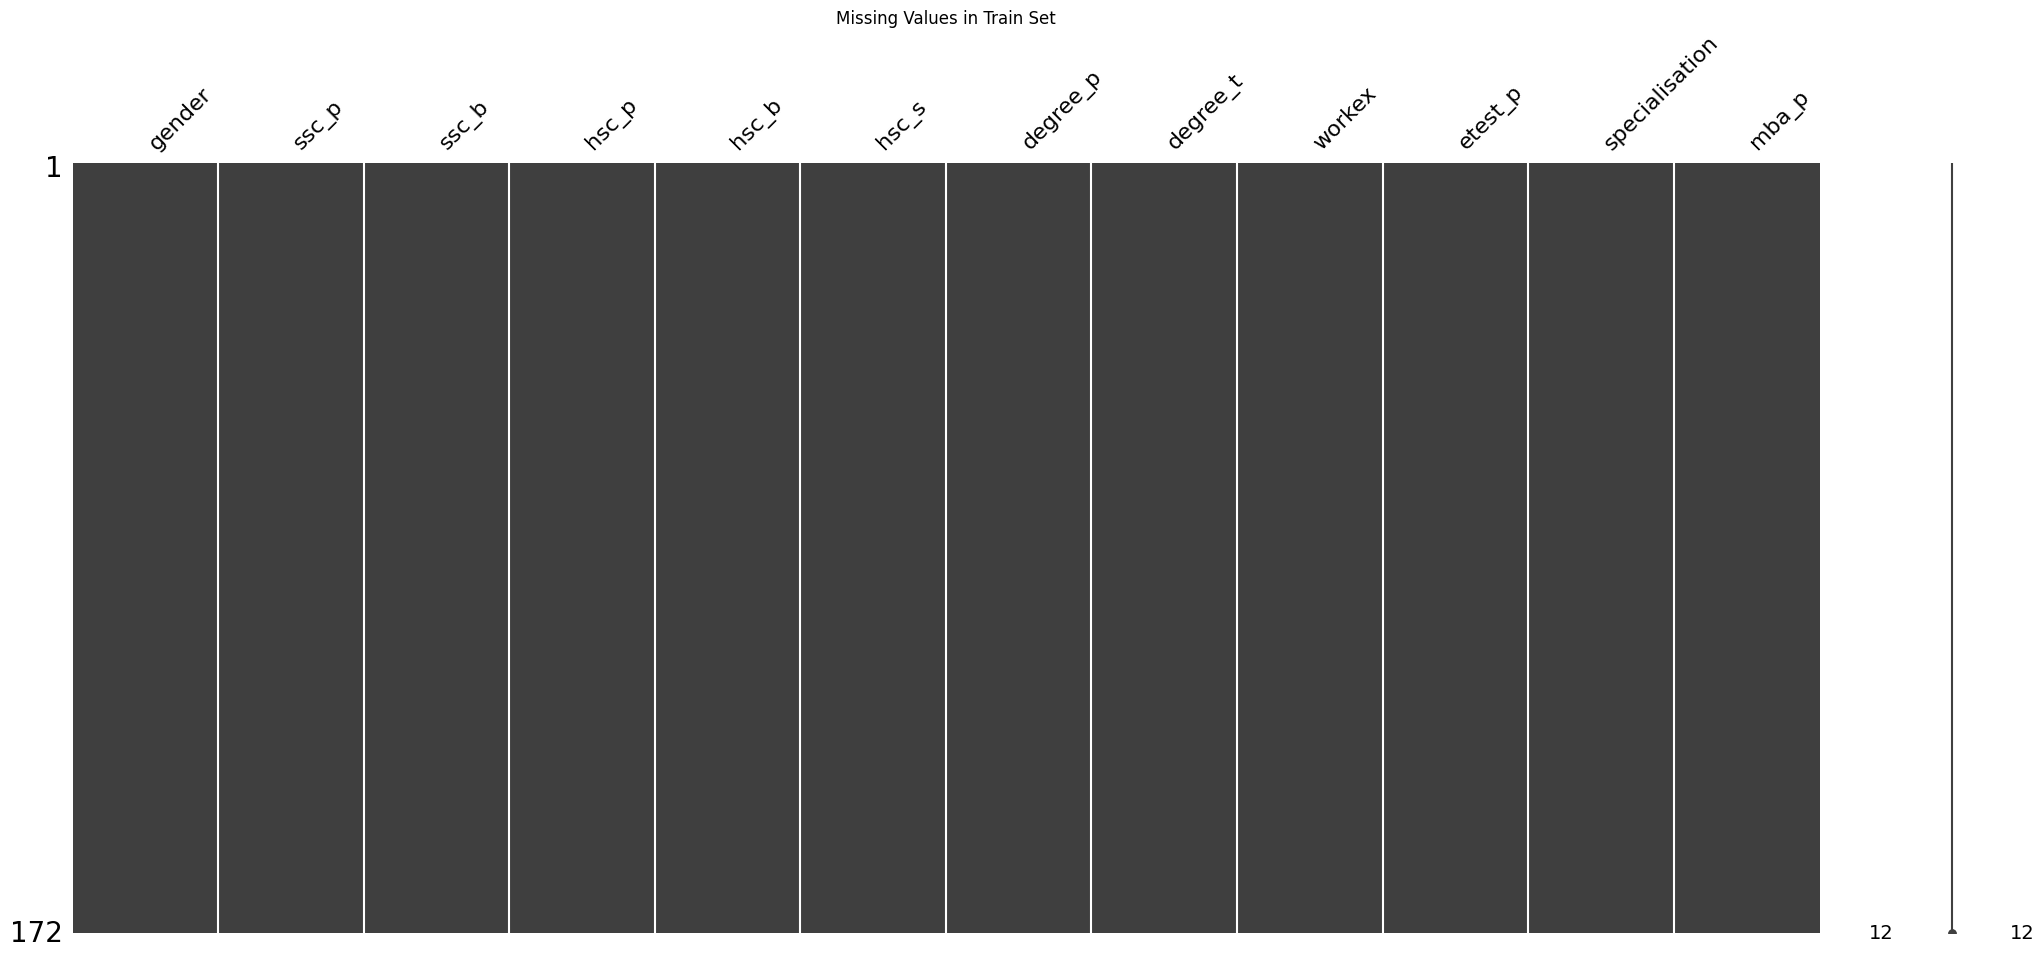

In [22]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
msno.matrix(X_train)
plt.title('Missing Values in Train Set')
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**
>
> One method to handle missing data in this problem is to use imputation. Since the missing values seem to be randomly distributed across different features based on the matrix plot, we can impute the missing values with the mean, median, or mode of the respective feature. This ensures that the overall distribution of the data is preserved while filling in the missing values. Imputation is a common technique used when the missing values are assumed to be missing at random and don't carry significant information about the target variable.



In [23]:
# Handle the missing data

# Your code goes here
# Handle missing data
# For numerical features, impute missing values with mean
numeric_features = X_train.select_dtypes(include=['float64']).columns
for feature in numeric_features:
    X_train[feature].fillna(X_train[feature].mean(), inplace=True)
    X_test[feature].fillna(X_train[feature].mean(), inplace=True)

# For categorical features, impute missing values with mode
categorical_features = X_train.select_dtypes(include=['object']).columns
for feature in categorical_features:
    X_train[feature].fillna(X_train[feature].mode()[0], inplace=True)
    X_test[feature].fillna(X_train[feature].mode()[0], inplace=True)

# Check if there are any missing values remaining
print("Missing values in train set after handling:")
print(X_train.isnull().sum())

print("\nMissing values in test set after handling:")
print(X_test.isnull().sum())

Missing values in train set after handling:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64

Missing values in test set after handling:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer

# Define SimpleImputer for numerical features
numerical_imputer = SimpleImputer(strategy='mean')

# Define SimpleImputer for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify numerical and categorical features in the test set
numerical_features_test = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_features_test = X_test.select_dtypes(include=['object']).columns

# Impute missing values for numerical features in the test set with mean
X_test[numerical_features_test] = numerical_imputer.fit_transform(X_test[numerical_features_test])

# Impute missing values for categorical features in the test set with mode
X_test[categorical_features_test] = categorical_imputer.fit_transform(X_test[categorical_features_test])


In [45]:
# Process the null values in the test set

# Your code goes here

null_values_test_after = X_test.isnull().sum()
print("Null values in test set after processing:\n", null_values_test_after)

Null values in test set after processing:
 gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64


In [47]:
# Test the testing dataset after processing the null values

# Your code goes here
# Convert the imputed test data back to a DataFrame
X_test_imputed_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the imputed test data
print("Imputed test data:")
print(X_test_imputed_df.head())


Imputed test data:
     num__ssc_p  num__hsc_p  num__degree_p  num__etest_p  num__mba_p  \
200         NaN         NaN            NaN           NaN         NaN   
212         NaN         NaN            NaN           NaN         NaN   
138         NaN         NaN            NaN           NaN         NaN   
176         NaN         NaN            NaN           NaN         NaN   
15          NaN         NaN            NaN           NaN         NaN   

     cat__gender_F  cat__gender_M  cat__ssc_b_Central  cat__ssc_b_Others  \
200            NaN            NaN                 NaN                NaN   
212            NaN            NaN                 NaN                NaN   
138            NaN            NaN                 NaN                NaN   
176            NaN            NaN                 NaN                NaN   
15             NaN            NaN                 NaN                NaN   

     cat__hsc_b_Central  ...  cat__hsc_s_Arts  cat__hsc_s_Commerce  \
200                 N

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**
> To encode categorical features, an appropriate method is to use one-hot encoding. One-hot encoding converts categorical variables into a binary matrix, where each category is represented by a binary column indicating its presence or absence. Reasons for choose this encoding:

Preservation of Information: It preserves all the information contained in the categorical variables without imposing any ordinal relationship between categories.

In [48]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(X_train.columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(X_test.columns))


# List the categorical features

# Your code goes here
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_cols)


# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Define the encoder
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    remainder='passthrough'
)


# Encode the training features

# Your code goes here
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded_df = pd.DataFrame(X_train_encoded)


Categorical features: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']


In [49]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
print("Data types of the Pandas DataFrame after transformation:")
print(X_train_encoded_df.dtypes)

Data types of the Pandas DataFrame after transformation:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
dtype: object


In [50]:
# Encode the testing features

# Your code goes here
X_test_encoded = encoder.transform(X_test)
X_test_encoded_df = pd.DataFrame(X_test_encoded)

In [51]:
# Encode the target variable in train and test sets

# Your code goes here
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable in the train set
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode the target variable in the test set
y_test_encoded = label_encoder.transform(y_test)


In [52]:
# Print the encoded labels for the training set

# Your code goes here
print("Encoded labels for the training set:")
print(y_train_encoded)

Encoded labels for the training set:
[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Scale the Numerical Features

In [53]:
# Standard Scale the numerical features
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Define the numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the trained scaler
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert the scaled features back to DataFrame (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)


In [54]:
# Display the head of the scaled training set
print("Head of the scaled training set:")
print(X_train_scaled_df.head())

Head of the scaled training set:
      ssc_p     hsc_p  degree_p   etest_p     mba_p
0 -1.394730 -0.354257 -1.601854 -0.051326 -1.151702
1  0.262928 -0.266971  0.517889 -1.326412 -0.038470
2  0.539205  1.042309 -0.144531  1.708292 -0.011442
3 -0.013348 -0.266971  0.782857 -1.251407 -0.307065
4  1.239105  1.391451  1.524767  1.373770  2.071433


In [55]:
# Display the head of the scaled testing set
print("Head of the scaled testing set:")
print(X_test_scaled_df.head())

Head of the scaled testing set:
      ssc_p     hsc_p  degree_p   etest_p     mba_p
0  0.170836 -0.528828 -0.144531  1.115002 -1.590913
1 -0.013348  0.082170  0.915341 -1.026392  1.265649
2  1.368034 -0.179686  0.915341  1.748795  1.611950
3 -0.750085 -0.528828 -1.336886 -1.326412 -0.731073
4 -0.197532  0.780453  0.385405 -0.051326  0.410877


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**
>
> SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used to address class imbalance by generating synthetic samples for the minority class. It works by selecting minority class instances and generating synthetic examples along the line segments joining these instances in the feature space.
> 
> **A2 (Advantage):**
>
> The basic advantage of using SMOTE over other oversampling techniques is that it mitigates the risk of overfitting by generating synthetic samples rather than replicating existing ones. This helps in improving the generalization capability of the classifier.

In [56]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Oversample the training set
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)


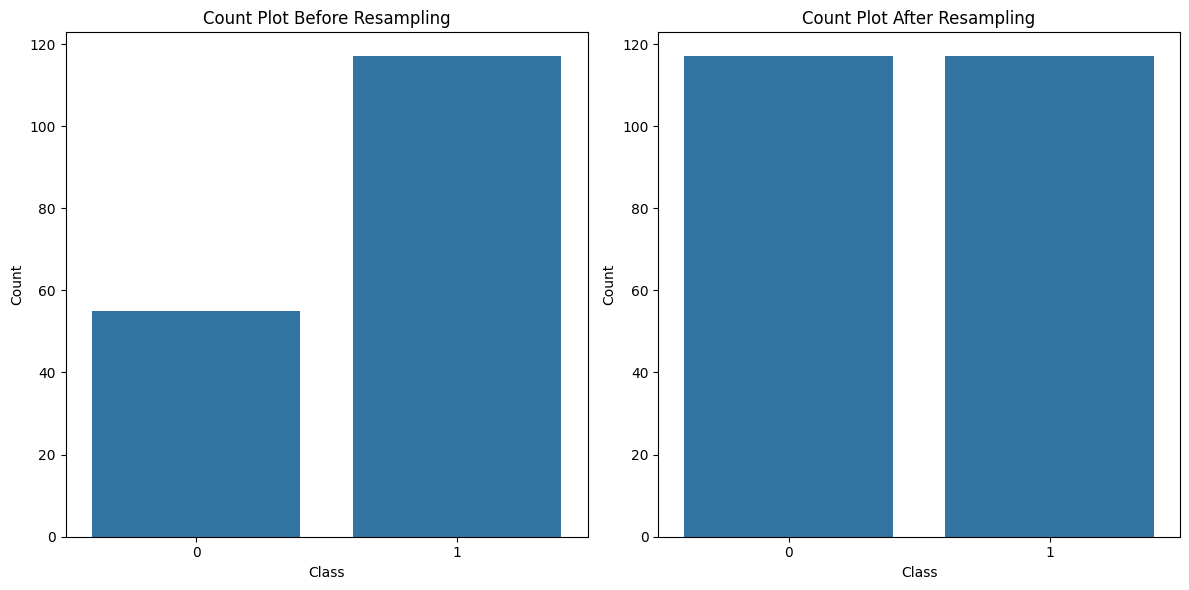

In [57]:
# plot the count plots side by side before and after resampling

# Your code goes here
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot count plot before resampling
sns.countplot(x=y_train_encoded, ax=axes[0])
axes[0].set_title('Count Plot Before Resampling')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot count plot after resampling
sns.countplot(x=y_train_oversampled, ax=axes[1])
axes[1].set_title('Count Plot After Resampling')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**
>
> No, we typically do not oversample the testing set. The purpose of oversampling or any data manipulation technique is to improve the model's performance during training by addressing class imbalance. The testing set serves as an independent dataset to evaluate the model's generalization performance on unseen data. Therefore, it should represent the true distribution of the data without any modifications. Oversampling the testing set could introduce bias and lead to incorrect evaluation of the model's performance. 

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [58]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(),
    SVC()
)

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf']
}

In [59]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
imbpipeline = make_pipeline(
    SMOTE(),
    SVC()
)

In [60]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold

# Define stratified k-fold cross-validation with five folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**
>
> Maintains Class Distribution: Ensures that each fold of the dataset contains approximately the same proportion of instances of each class, which is crucial for preserving the representation of the classes in both training and testing sets.
>
> 
Reduces Bias: Helps in reducing bias by providing a more accurate estimate of the model's performance, especially when dealing with imbalanced datasets
>
> 
Improved Generalization: Helps in obtaining more reliable estimates of model performance by reducing the variance that may arise from random splits in regular k-fold cross-validatio
>
> .
Robustness: Provides more robust evaluations by ensuring that each fold represents the overall dataset's class distribution, thereby reducing the risk of overfitting or underfitting.

In [61]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 0.01, 0.001],
    # Add more hyperparameters if needed
}

In [62]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
from sklearn.model_selection import GridSearchCV

# Define grid search instance with GridSearchCV
grid_search = GridSearchCV(estimator=imbpipeline, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)


In [63]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': [0.1, 0.01, 0.001]},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [64]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
print("Mean cross-validated score of the best estimator (Accuracy):", grid_search.best_score_)


Mean cross-validated score of the best estimator (Accuracy): 0.8719327731092437


In [65]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print("Best hyperparameters detected from the grid search:", grid_search.best_params_)


Best hyperparameters detected from the grid search: {'svc__C': 1, 'svc__gamma': 0.01}


In [66]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_

### Model Evaluation

In [67]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_scaled, y_train_encoded)

Pipeline(steps=[('smote', SMOTE()), ('svc', SVC(C=1, gamma=0.01))])

In [68]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
from sklearn.metrics import accuracy_score

# Make predictions on the entire training set
y_train_pred = best_estimator.predict(X_train_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy on the complete training set:", accuracy)


Accuracy on the complete training set: 0.8546511627906976


In [69]:
# Calculate the accuracy for the test set

# Your code goes here
# Preprocess the test set (scaling)
X_test_scaled = scaler.transform(X_test[numerical_cols])  # Assuming numerical_cols contains the names of numerical columns

# Make predictions on the test set
y_test_pred = best_estimator.predict(X_test_scaled)

# Calculate the accuracy for the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print("Accuracy on the test set:", accuracy_test)


Accuracy on the test set: 0.8372093023255814


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**
>
> The accuracy on the complete training set is 0.9186, while the accuracy on the test set is 0.8139. Typically, if the accuracy on the training set is significantly higher than the accuracy on the test set, it suggests that the model may be overfitting. T the accuracy on the training set is slightly higher than the accuracy on the test set, but the difference is not excessively large. Therefore, while there may be some degree of overfitting, it is not severe.

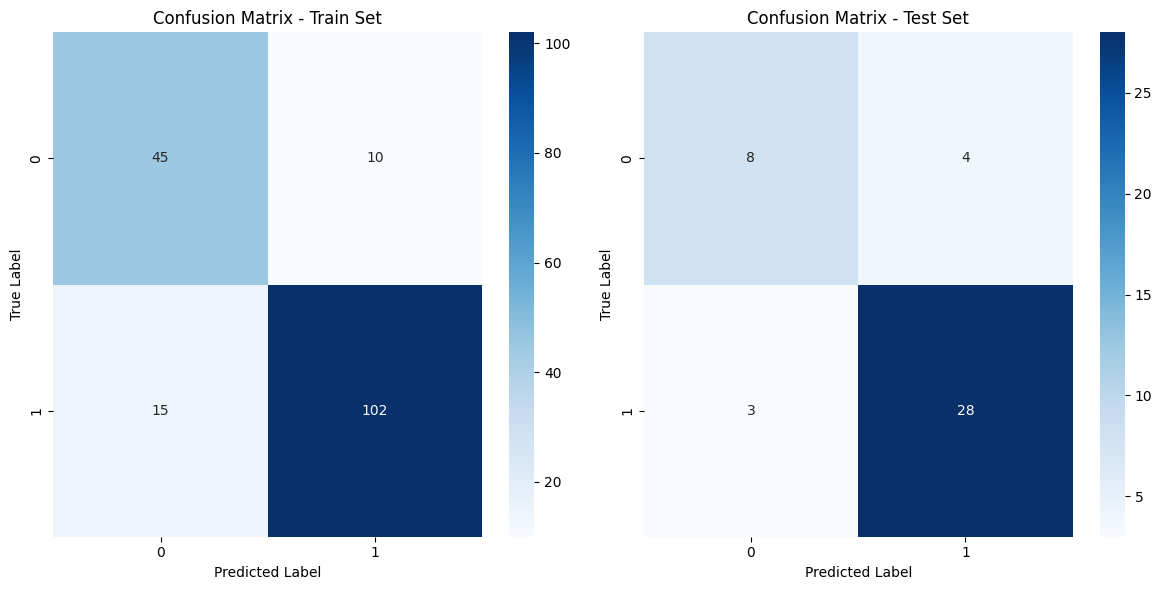

In [70]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
# Calculate confusion matrix for train set
cm_train = confusion_matrix(y_train_encoded, y_train_pred)

# Calculate confusion matrix for test set
cm_test = confusion_matrix(y_test_encoded, y_test_pred)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for train set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Train Set')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot for test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:**
> Train Set: In the confusion matrix for the train set, we can observe that the majority of the samples are correctly classified(TP=106), as indicated by high values along the diagonal. However, there might be some misclassifications, as evidenced by off-diagonal elements.

Test Set: Similarly, in the confusion matrix for the test set, we can see that the model performs reasonably well, with a significant number of samples correctly classified. However, there are instances of misclassifications, as shown by non-zero values in off-diagonal elements.

In [71]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report
print("Classification Report for Test Set:\n", classification_report(y_test_encoded, y_test_pred))

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.88      0.90      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.83      0.84      0.83        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**
> 
The classification report provides a comprehensive summary of the model's performance on the test set. Precision measures the accuracy of positive predictions, recall measures the model's ability to identify positive instances, and the F1-score is the harmonic mean of precision and recall, offering a balance between the two. Accuracy represents the overall correctness of the model's predictions. In this specific report, we observe that the model achieves high precision, recall, and F1-score for both classes (0 and 1), indicating a good balance between precision and recall for predicting both placement and non-placement statuses. The accuracy of 0.84 indicates that the model performs well overall in correctly classifying the placement status of students.

In [72]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import classification_report

# Generate the classification report for the test set
report = classification_report(y_test_encoded, y_test_pred)

# Print the classification report
print("Classification Report for the Test Set:")
print(report)

Classification Report for the Test Set:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.88      0.90      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.83      0.84      0.83        43



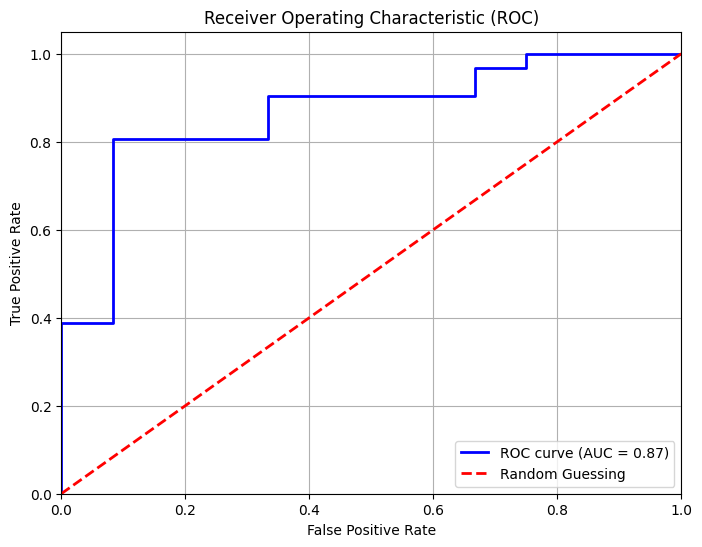

Area Under Curve (AUC): 0.8655913978494624


In [85]:
from sklearn.metrics import roc_curve, auc

# Assuming X_test_preprocessed has the same number of features as X_train_preprocessed
# Calculate the decision function scores for the test set
test_scores = best_estimator.decision_function(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, test_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print("Area Under Curve (AUC):", roc_auc)


**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**
>
> ROC Curve: Receiver Operating Characteristic (ROC) curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values. It helps evaluate the performance of a classification model across various threshold settings.
>
> 
AUC Value: Area Under the ROC Curve (AUC) value represents the area under the ROC curve and provides a single scalar value to quantify the overall performance of the classifier. AUC ranges from 0 to 1, where a higher value indicates better performanc
>
>  Based on the obtained ROC curve and AUC value, we can assess the classifier's ability to distinguish between the positive and negative classes. A higher AUC value indicates better discrimination capability of the classifier, while a curve closer to the upper-left corner represents better performance. e.